# Project 1 ( EDA with MySQL)

Do the following  EDA by taking data from MY sql :

Create a table named studmarks in Mysql . Choose the column name and its datatypes accordingly to the students_marks .csv in github link that was provided.

Load the data of students marks.csv into mysql database by load local infile command . 

Now open jupyter notebook ,make a connection with mysql ,fetch the data of students marks in notebook. (This process is known as data mining).

Now the data is loaded in jupyter notebook ,now start making evaluation of data using all steps of EDA(exploratory data analysis).

# Importing Studmarks.csv from mySQL

In [1]:
# Pulling mySQL data into Jupyter Notebook
# <<!pip install mysql_connector_python>> ---- Need to do only once.

In [2]:
# Importing required libraries
import mysql.connector
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
con= mysql.connector.connect(host = "localhost", port = 3307, user="root", password="Iwashome1234$", database="project")
# Note: port is 3306 for most users but it's 3307 for my system as I had to change it during installation of the Version 8.

#con will now help to connect with mySQL

In [4]:
# Let's define a function that reads the sql query

def Q(sql):
    res=pd.read_sql_query(sql,con)
    return(res)

In [5]:
#Let's try to display all data from Table studmarks created in mySQL

res=Q("select * from studmarks")
res

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,1988-05-04,55,45,56,87,21,52,89,65
1,Suresh,M,1987-04-05,75,96,78,64,90,61,58,2
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
3,Jessica,F,1990-12-08,78,96,86,63,54,89,75,45
4,Jennifer,F,1989-02-09,58,96,78,46,96,77,83,53
5,Annu,F,1988-05-04,45,87,52,89,55,89,87,52
6,pooja,F,1987-04-05,55,64,61,58,75,58,64,61
7,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87
8,Farha,F,1990-12-08,55,63,89,75,78,75,63,89
9,Mukesh,M,1989-02-09,96,46,77,83,58,83,46,77


# EDA of studmarks which is stored in 'res'

In [6]:
res.shape
# 10 Rows and 11 Columns are present
# The dataset shows Name, Gender, Date of Birth and  Marks in various Subjects

(10, 11)

In [7]:
res.describe()
# Based on the below information there doesn't seem to be outliers.

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


In [8]:
res.dtypes

Name         object
Gender       object
DOB          object
Maths         int64
Physics       int64
Chemistry     int64
English       int64
Biology       int64
Economics     int64
History       int64
Civics        int64
dtype: object

In [9]:
# Let's do some visualization
import matplotlib.pyplot as plt
import seaborn as sns

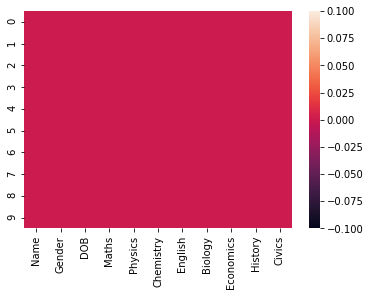

In [10]:
# Checking for null values
sns.heatmap(res.isnull())
# No Null Values found

In [11]:
# let's see if there's any correlation between marks
dfcor=res.corr()
dfcor

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
Maths,1.000000,0.113354,0.076751,-0.064074,-0.146598,0.000312,-0.320846,-0.274629
Physics,0.113354,1.000000,0.117192,-0.562608,0.279638,0.191851,0.334082,-0.643266
Chemistry,0.076751,0.117192,1.000000,-0.409680,0.318032,0.235390,-0.482710,0.210908
English,-0.064074,-0.562608,-0.409680,1.000000,-0.330844,0.237577,-0.038775,0.186705
Biology,-0.146598,0.279638,0.318032,-0.330844,1.000000,0.370531,-0.456131,-0.330060
Economics,0.000312,0.191851,0.235390,0.237577,0.370531,1.000000,-0.164953,0.043905
History,-0.320846,0.334082,-0.482710,-0.038775,-0.456131,-0.164953,1.000000,-0.048686
Civics,-0.274629,-0.643266,0.210908,0.186705,-0.330060,0.043905,-0.048686,1.000000


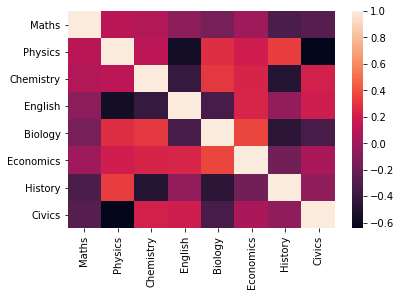

In [12]:
sns.heatmap(dfcor)

In [13]:
# We can see other than Physics-Civics (Slight Negatively Correlated) and Physics - English (Slight Negatively Correlated); 
# no other subjects seem to be correlated

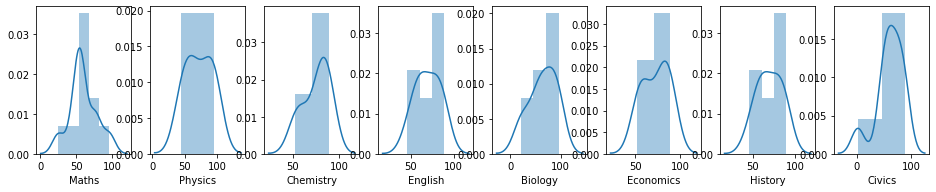

In [14]:
# Let's see how marks are distributed

collist=res.columns.values

ncol=8
nrows=10

plt.figure(figsize=(2*ncol,4*ncol))
# Starting loop from column 3 - Count of Subjects:-
for i in range(3,len(collist)):
    plt.subplot(nrows,ncol,i-2)
    sns.distplot(res[collist[i]])

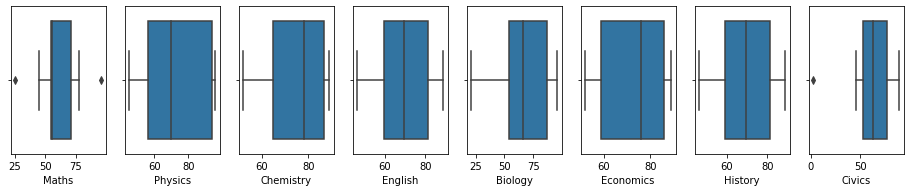

In [15]:
# Let's look at the boxplots of all the subjects

plt.figure(figsize=(2*ncol,4*ncol))
for i in range(3,len(collist)):
    plt.subplot(nrows,ncol,i-2)
    sns.boxplot(res[collist[i]])

# We can see 2 outliers in Maths and 1 in Civics, however they can be genuine ouliers as it's possible that the student scored 0-100

In [16]:
# Let's add another Feature Total to store the sum of all subjects scored by individuals

res.loc[:,'Total'] = res.sum(numeric_only=True, axis=1)
res

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total
0,John,M,1988-05-04,55,45,56,87,21,52,89,65,470
1,Suresh,M,1987-04-05,75,96,78,64,90,61,58,2,524
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74,556
3,Jessica,F,1990-12-08,78,96,86,63,54,89,75,45,586
4,Jennifer,F,1989-02-09,58,96,78,46,96,77,83,53,587
5,Annu,F,1988-05-04,45,87,52,89,55,89,87,52,556
6,pooja,F,1987-04-05,55,64,61,58,75,58,64,61,496
7,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87,517
8,Farha,F,1990-12-08,55,63,89,75,78,75,63,89,587
9,Mukesh,M,1989-02-09,96,46,77,83,58,83,46,77,566


In [17]:
# Also adding another feature Age to find out more meaningful insights
res['DOB'] = pd.to_datetime(res['DOB'])
res['Age']=2020-res['DOB'].dt.year
res

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total,Age
0,John,M,1988-05-04,55,45,56,87,21,52,89,65,470,32
1,Suresh,M,1987-04-05,75,96,78,64,90,61,58,2,524,33
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74,556,31
3,Jessica,F,1990-12-08,78,96,86,63,54,89,75,45,586,30
4,Jennifer,F,1989-02-09,58,96,78,46,96,77,83,53,587,31
5,Annu,F,1988-05-04,45,87,52,89,55,89,87,52,556,32
6,pooja,F,1987-04-05,55,64,61,58,75,58,64,61,496,33
7,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87,517,31
8,Farha,F,1990-12-08,55,63,89,75,78,75,63,89,587,30
9,Mukesh,M,1989-02-09,96,46,77,83,58,83,46,77,566,31


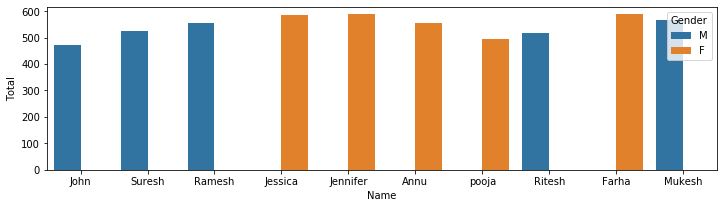

In [18]:
#Let's look at the individual Totals
plt.figure(figsize = (12,3))
sns.barplot(res['Name'],res['Total'],hue=res['Gender'])

In [19]:
# Let's now have a look at the Gender wise Averge Marks Scored in each subject
res_group=res.groupby(['Gender']).agg({'Maths':'mean','Physics':'mean','Chemistry':'mean','English':'mean','Biology':'mean'
                                      ,'Economics':'mean','History':'mean','Civics':'mean','Total':'mean'})
res_group

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total
Gender,,,,,,,,,
F,58.2,81.2,73.2,66.2,71.6,77.6,74.4,60,562.4
M,61.0,63.4,77.4,73.2,57.8,67.8,65.0,61,526.6


In [20]:
# Let's now have a look at the Age wise Averge Marks Scored in each subject
res_group_age=res.groupby(['Age']).agg({'Maths':'mean','Physics':'mean','Chemistry':'mean','English':'mean','Biology':'mean'
                                      ,'Economics':'mean','History':'mean','Civics':'mean','Total':'mean'})
res_group_age

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total
Age,,,,,,,,,
30,66.50,79.5,87.50,69.00,66.0,82.00,69.00,67.00,586.5
31,58.25,68.0,82.75,65.25,68.5,75.75,65.25,72.75,556.5
32,50.00,66.0,54.00,88.00,38.0,70.50,88.00,58.50,513.0
33,65.00,80.0,69.50,61.00,82.5,59.50,61.00,31.50,510.0


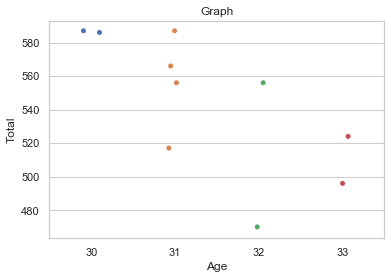

In [21]:
sns.set(style='whitegrid')
ax=sns.stripplot(x='Age',y='Total',data=res)
plt.title('Graph')
plt.show()

# Importing Titanic_train.csv dataset

In [22]:
titanic=Q("select * from titanic")
titanic.head(10)

,PassengerId,Survived,Pclass,name,sex,Age,Sibsp,Parch,ticket,Fare,cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,None,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,None,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,None,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,None,C


In [23]:
titanic.shape

(891, 12)

In [24]:
# Let's also import winedataset.csv and then begin the EDA of titanic followed by winedataset

# Importing winedataset.csv dataset

In [25]:
wine=Q("select * from wine")
wine.head(10)

,Class,Alcohol,Malic_Acid,Ash,Alcalanity_of_Ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [26]:
wine.shape

(178, 14)

# EDA of Titanic_train which is stored in 'titanic'

In [27]:
#Let's describe the dataset
titanic.describe(include='all')

# This dataset shows If Passengers Survived(1) or not(0). Various features are provided. Let's have a look at the various 
# features and see which ones are useful and how they are related

,PassengerId,Survived,Pclass,name,sex,Age,Sibsp,Parch,ticket,Fare,cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Collyer, Mr. Harvey",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.712885,0.523008,0.381594,NaN,32.204203,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.529273,1.102743,0.806057,NaN,49.693412,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.250000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


PassengerId      0
Survived         0
Pclass           0
name             0
sex              0
Age            177
Sibsp            0
Parch            0
ticket           0
Fare             0
cabin          687
Embarked         2
dtype: int64


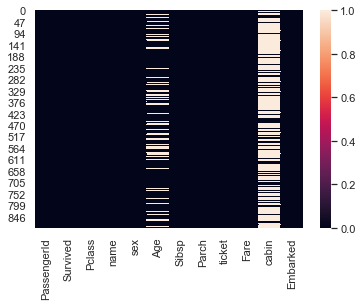

In [28]:
# Let's have a look at the Null Values
print(titanic.isnull().sum())
sns.heatmap(titanic.isnull())
plt.show()

In [29]:
#Age and Embarked can be replaced by Mean and Mode, but Cabin contains huge no. of null values. Better to drop it. 
#Also, Let's replace Null Values in 'Age' with the mean Age and 'Embarked' feature with mode

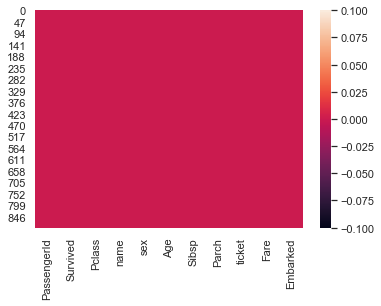

In [30]:
titanic.drop('cabin',axis=1,inplace=True)
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)
# All Null Values removed. Let's check the Null Values
sns.heatmap(titanic.isnull())

#Adding Columns SibSp and Parch to find total relatives including the person ---> Total_Rel

In [31]:
titanic['Total_Rel']=titanic['Sibsp']+titanic['Parch']+1
titanic.drop(['Sibsp','Parch'],axis=1,inplace=True)

#Other Features that can be dropped are:

Passengerid : Not Needed for analysis
name: Not effecting the results
ticket: Ticket No. not directly related to Survived People

In [32]:
titanic.drop(['PassengerId','name','ticket'],axis=1,inplace=True)

In [33]:
titanic.head()

,Survived,Pclass,sex,Age,Fare,Embarked,Total_Rel
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [34]:
#Let's understand different features
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

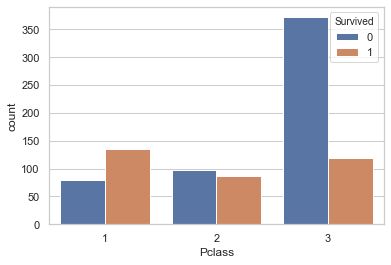

In [35]:
# Plotting Pclass against it's count
sns.countplot(titanic['Pclass'],hue=titanic['Survived'])

##This Plot indicates that 3rd Class Passengers had a lot of deaths as compared to Survived

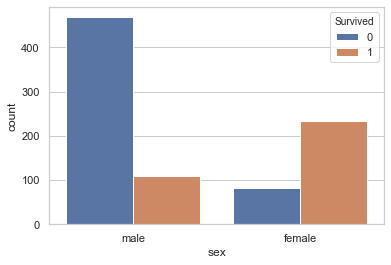

In [36]:
# Let's look at Sex Column
sns.countplot(titanic['sex'],hue=titanic['Survived'])

In Males: There are more deaths as compared to survivors
In Females: There are more survivors as compared to deaths

In [37]:
# Let's classify 'Age' into Age Groups
#0-30: Class 0; 31-60: Class 1; more than 60: Class 2
l=0
for a in titanic['Age']:
    if (a<=30):
        titanic['Age'][l]=0
    elif (a>30) and (a<=60):
        titanic['Age'][l]=1
    else:
        titanic['Age'][l]=2
    l=l+1

In [38]:
titanic.head()

,Survived,Pclass,sex,Age,Fare,Embarked,Total_Rel
0,0,3,male,0.0,7.2500,S,2
1,1,1,female,1.0,71.2833,C,2
2,1,3,female,0.0,7.9250,S,1
3,1,1,female,1.0,53.1000,S,2
4,0,3,male,1.0,8.0500,S,1


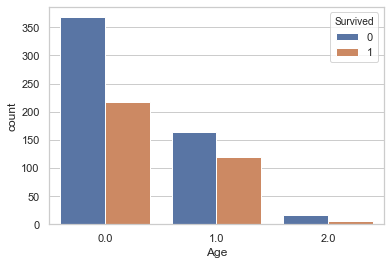

In [39]:
# Let's now plot on the basis of Age Group
sns.countplot(titanic['Age'],hue=titanic['Survived'])

#Age doesn't have impact on deaths as clear from above, but the population has more people of 0-30 > 31-60 > 60+

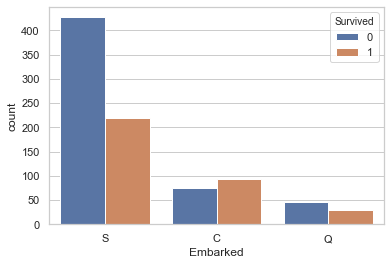

In [40]:
# Let's have a look at the embarked colum now
sns.countplot(titanic['Embarked'],hue=titanic['Survived'])

# In C more people have survived than deaths. Overall maximum population belongs to the S category

In [41]:
# Let us describe the Fare again
titanic.Fare.describe()
# There appears to be outliers

count    891.000000
mean      32.204203
std       49.693412
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329000
Name: Fare, dtype: float64

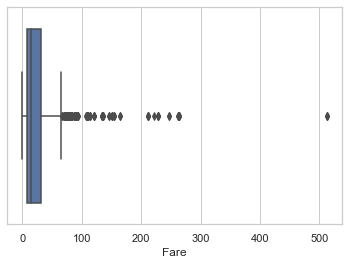

In [42]:
sns.boxplot(titanic['Fare'])

In [43]:
# If we use them for modelling we'll need to reduce these using Z Score values < 3


(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.    ,  51.2329, 102.4658, 153.6987, 204.9316, 256.1645,
        307.3974, 358.6303, 409.8632, 461.0961, 512.329 ]),
 <a list of 10 Patch objects>)

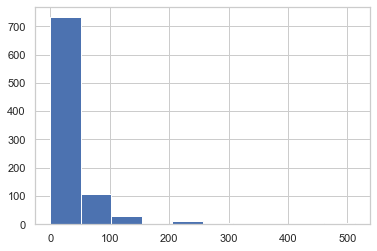

In [44]:
plt.hist(titanic['Fare'])

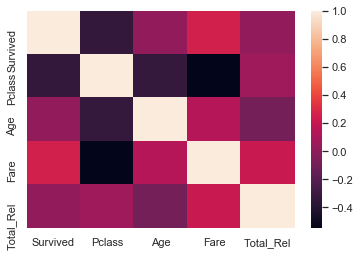

,Survived,Pclass,Age,Fare,Total_Rel
Survived,1.000000,-0.338481,0.015153,0.257307,0.016639
Pclass,-0.338481,1.000000,-0.333860,-0.549500,0.065997
Age,0.015153,-0.333860,1.000000,0.140378,-0.083670
Fare,0.257307,-0.549500,0.140378,1.000000,0.217139
Total_Rel,0.016639,0.065997,-0.083670,0.217139,1.000000


In [45]:
# Finally let's see how various numerical features are correlated with each other
sns.heatmap(titanic.corr())
plt.show()
titanic.corr()
#None of the features seem to be strongly correlated

# EDA of Winedataset.csv which is stored in wine

In [46]:
wine.head()
# This data classifies the wine into categories 

,Class,Alcohol,Malic_Acid,Ash,Alcalanity_of_Ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


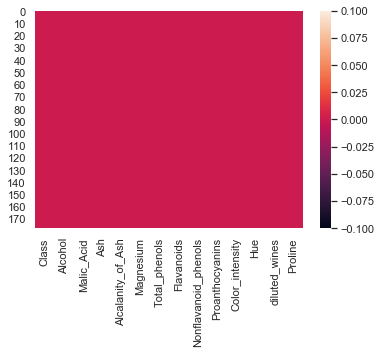

Class                   0
Alcohol                 0
Malic_Acid              0
Ash                     0
Alcalanity_of_Ash       0
Magnesium               0
Total_phenols           0
Flavanoids              0
Nonflavanoid_phenols    0
Proanthocyanins         0
Color_intensity         0
Hue                     0
diluted_wines           0
Proline                 0
dtype: int64

In [47]:

#Lets see null values
sns.heatmap(wine.isnull())
plt.show()

wine.isnull().sum()

In [48]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalanity_of_Ash     178 non-null    float64
 5   Magnesium             178 non-null    float64
 6   Total_phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  diluted_wines         178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(12), int64(2)
memory usage: 19.6 KB


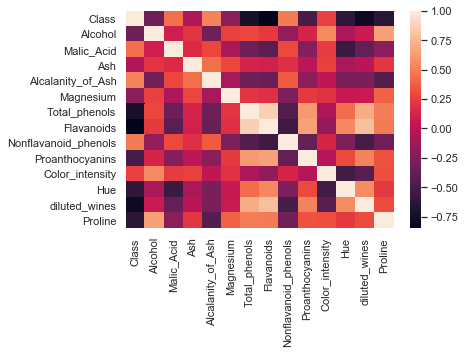

,Class,Alcohol,Malic_Acid,Ash,Alcalanity_of_Ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,diluted_wines,Proline
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalanity_of_Ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [49]:
# Let's look at the correlations
sns.heatmap(wine.corr())
plt.show()
wine.corr()

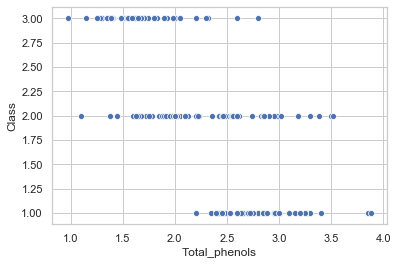

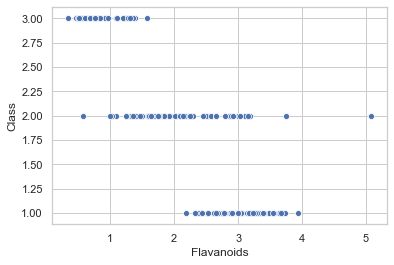

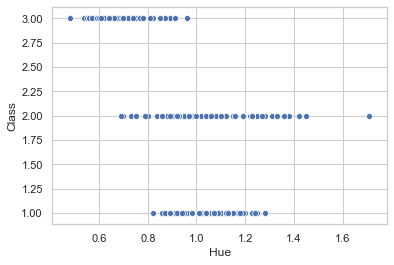

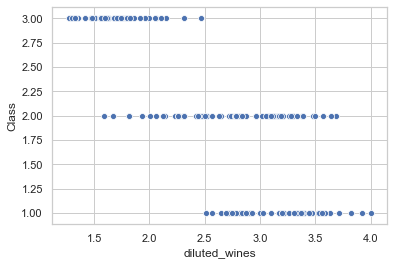

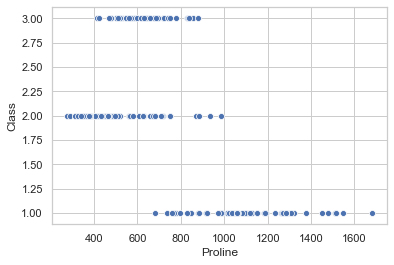

In [50]:
# There seems strong correlation between Class and [Total_phenols,Flavanoids,Hue,diluted_wines,Proline]
# Let's see the scatter plots

l=['Total_phenols','Flavanoids','Hue','diluted_wines','Proline']
for i in l:
    sns.scatterplot(x=i,y='Class',data=wine)
    plt.show()
    
#We can see from the graphs below how, the different classes are dependent on Feature values.

In [51]:
# Let's describe the features once
wine.describe()

,Class,Alcohol,Malic_Acid,Ash,Alcalanity_of_Ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


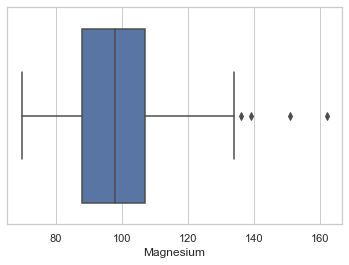

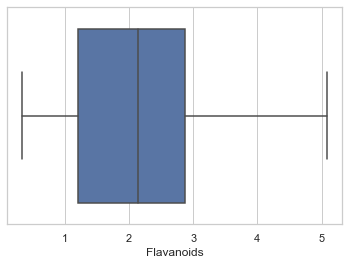

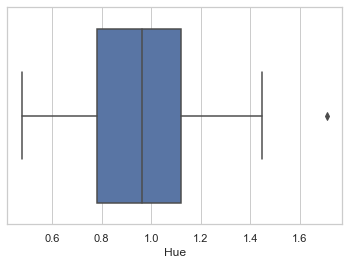

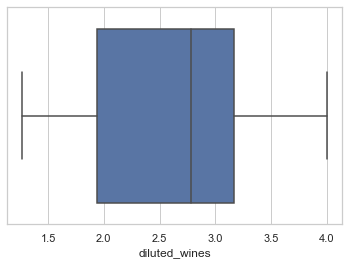

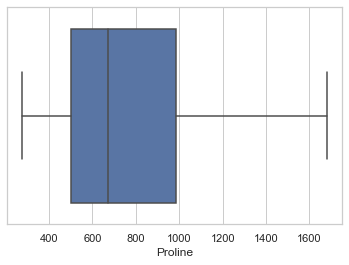

In [52]:
# Let's see boxplots of the some of the features
l=['Magnesium','Flavanoids','Hue','diluted_wines','Proline']
for i in l:
    sns.boxplot(wine[i])
    plt.show()
    
# There are a few outliers in Magnesium and Hue Features

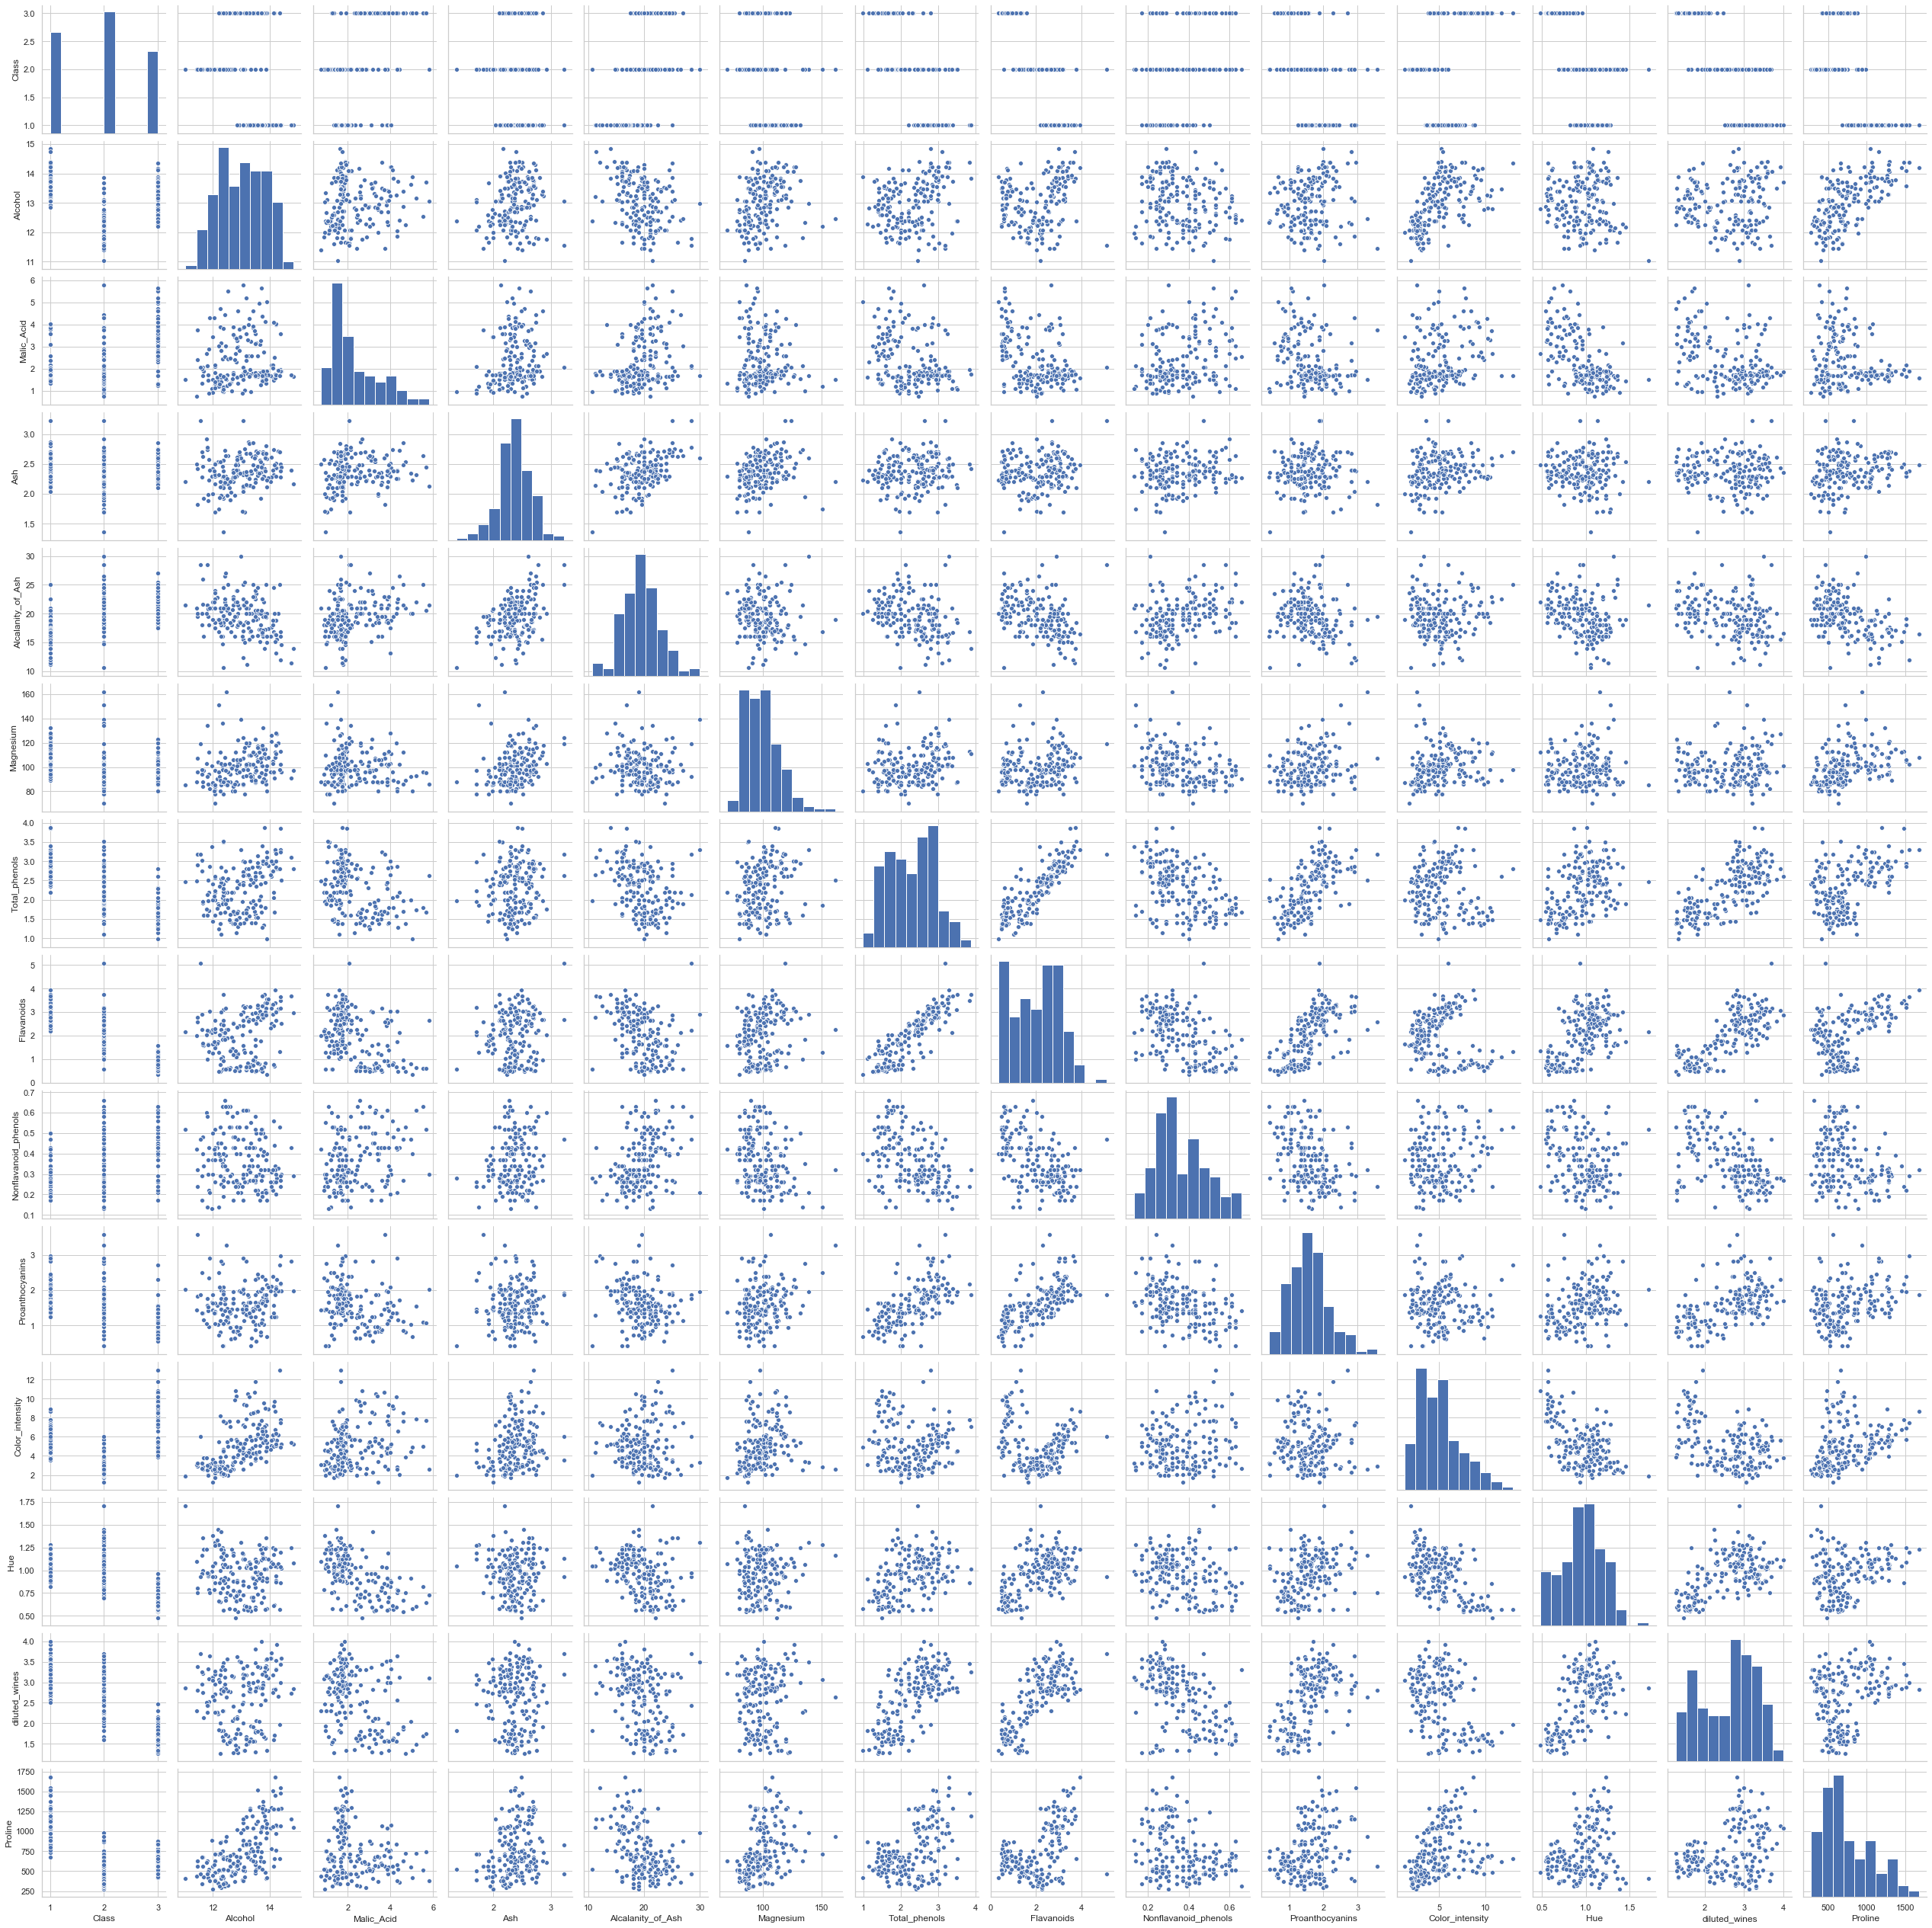

In [53]:
# Finally let's see the pair plot

sns.pairplot(wine)
plt.show()